**Application and implementation of electronic structure methods**  
by  
Prof. Jörg Neugebauer, Dr. Sarath Menon, Dr. Jing Yang, 
Ahmed Abdelkawy, Raynol Dsouza (MPI SusMat, Düsseldorf)

# Exercise 5: Efficient matrix diagonalization using sparse matrices

For efficient diagonalization of a matrix, the concept of 'sparse' matrices is often used in scientific computing. A matrix is said to be sparse if a majority of its elements are zero. This is the case for our laplacian matrix. As it turns out, storing and diagonalizing these sparse arrays using advanced routines from the `scipy.sparse` python module is a lot more efficient than solving the Hamiltonian using iterative schemes, as we did in the previous exercises.

Below we import
* `LinearOperator`: a class for representing sparse matrices
* `eigsh`: an eigensolver for sparse matrices

from `scipy.sparse.linalg`. Remember to use the `?` syntax in a jupyter notebook if you are unsure about the behavior of a class or function, etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh, LinearOperator
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure
#importing k3d to visualize 3d wavefunctions. 
# Comment the next line out if you don't have k3d installed
import k3d

## 1. Read and understand the Schroedinger_1D class below

- `laplace`: return the laplacian
- `ham_psi`: return the hamiltonian
- `solve`: use the sparse matrix routines available in scipy to diagonalize and get eigenvalues for the hamiltonian
- `plot`: plot the wave functions for each state on top of the potential

We are directly storing eigenvectors and eigenvalues in lists that belong to the class, `self.eigenvectors` and `self.eigenvalues`.

In [2]:
class Schroedinger_1D:
    def __init__(self, mesh=10, n_states=10, pot=np.cos, plot_scale=5):
        self.mesh = mesh
        self.x, self.dx = np.linspace(0, 2*np.pi, mesh, endpoint=False, retstep=True)
        self.pot = 10*pot(self.x)
        self.n_states = n_states
        self.eigenvectors = []
        self.eigenvalues = []
        self.plot_scale = plot_scale
        
    def laplace(self, psi):
        return (np.roll(psi, 1) + np.roll(psi, -1) - 2 * psi)/self.dx**2        

    def ham_psi(self, psi):
        return -1/2*self.laplace(psi) + self.pot * psi
    
    def solve(self):
        A = LinearOperator((self.mesh,self.mesh), self.ham_psi)

        ew, ev = eigsh(A, which='SA', k=self.n_states)
        self.eigenvectors = ev.T
        self.eigenvalues = ew
    
    def plot(self):
        plt.plot(self.x, self.pot, 'k')
        if not len(self.eigenvalues):
            print("WARNING: Only showing the potential. Please run self.solve() to populate eigenvectors/values.")
        for i in range(len(self.eigenvalues)):
            plt.plot(self.x, self.eigenvectors[i]*self.plot_scale + self.eigenvalues[i])
            plt.plot(self.x, self.eigenvectors[i]*0 + self.eigenvalues[i], 'k--')
        plt.show()

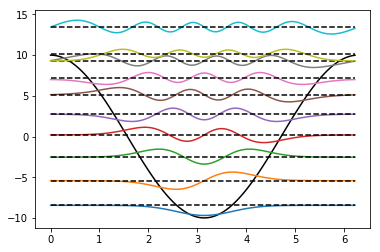

In [3]:
ham = Schroedinger_1D(mesh=100, pot=np.cos)
ham.solve()
ham.plot()

## 2.  Create a 2D Schroedinger solver

Using the above `Schroedinger_1D` class, modify the required functions to create a `Schroedinger_2D` class.

You will need to make use of the following commands:

- `np.reshape`
- `flatten()` which is applied to numpy arrays

Remember to use the `command?` syntax if you are unsure about the usage of a function.## 2D Schroedinger equation

In [ ]:
class Schroedinger_2D:
    """
    Build your class below
    """

## 3. Create a 3D Schroedinger solver

Continue building on the `Schroedinger_1D` and `Schroedinger_2D` classes to create a 3D Schroedinger solver.

You will need to make use of the 3D plotting module `k3d` or use `matplotlib` 2D/3D plotting routines.

In [ ]:
class Schroedinger_3D:
    """
    Build your class below
    """